In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os

In [2]:
datasets = [name for name in os.listdir('../training_data') if os.path.isdir(os.path.join('../training_data', name))]

In [3]:
os.makedirs('pngs', exist_ok=True)

In [4]:
def plot_acc(dataset):
    # Load dataset
    acc_df = pd.read_csv(f"../acc_rate_csvs/{dataset}.csv")
    dataset_size = pd.read_csv(f"../training_data/{dataset}/folds.csv").shape[0]

    # Define a fixed order for the methods
    fixed_method_order = sorted(acc_df['method'].unique())

    # Create a figure with a single subplot
    fig, ax = plt.subplots(1, 1, figsize=(4, max(2, acc_df['method'].nunique() / 10)))  # Ensure minimum height

    ### First plot: Accuracy per fold ###
    for method in fixed_method_order:
        if method in acc_df['method'].unique():
            method_data = acc_df[acc_df['method'] == method]
           
            # Set color to red if method contains 'gru' or 'lstm', otherwise black
            color = 'red' if "gru" in method or "lstm" in method or "rnn" in method or "mlp" in method else 'black'
           
            # Scatter plot (all methods treated the same)
            ax.scatter(method_data['acc'], [method]*len(method_data), s=20, marker='D', color='white', edgecolor=color, linewidth=1)

    # Add labels for the first plot
    ax.set_xlabel('Accuracy (acc)')
    ax.set_ylabel('Method')
    ax.set_yticks(fixed_method_order)  # Set y-ticks to fixed method order
    ax.grid(True)

    # Add a single overall title for the entire figure
    fig.suptitle(f'{dataset} ({dataset_size} instances)')

    # Save the figure as a PNG file
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

In [5]:
# def format_large_number(num):
#     """Format numbers greater than 1 million with 'M' suffix and two decimal places."""
#     if num >= 1_000_000:
#         return f"{num / 1_000_000:.2f}M"  # Format with two decimal places
#     return str(num)

# for dataset in datasets:
#     acc_df = pd.read_csv(f"../acc_rate_csvs/{dataset}.csv")
#     dataset_size = pd.read_csv(f"../training_data/{dataset}/folds.csv").shape[0]
#     dataset_length_min = pd.read_csv(f"../training_data/{dataset}/features.csv")['count'].min()
#     dataset_length_max = pd.read_csv(f"../training_data/{dataset}/features.csv")['count'].max()
#     dataset_latex = dataset.replace("_", "\\_")  # Replace "_" with "\_"

#     # Format dataset size
#     formatted_size = format_large_number(dataset_length_max)
    
#     print(f'{dataset_latex} & {dataset_length_min} - {formatted_size} & {dataset_size} \\\\')

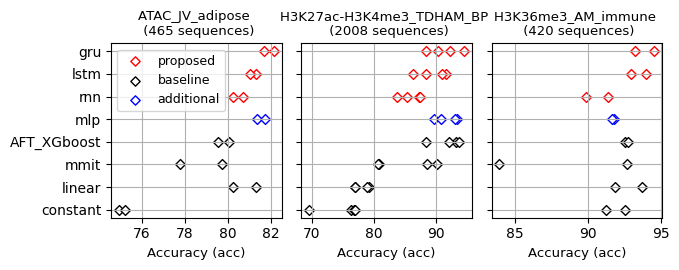

In [10]:
def plot_multiple_datasets(datasets):
    # Determine number of datasets for subplot layout
    num_datasets = len(datasets)
    
    # Create a figure with subplots in one row
    fig, axes = plt.subplots(1, num_datasets, figsize=(2.3 * num_datasets, 2.8), sharey=True)  # Share y-axis

    # If there is only one dataset, axes will not be an array, so make sure it's iterable
    if num_datasets == 1:
        axes = [axes]

    # Loop through each dataset and subplot
    for i, dataset in enumerate(datasets):
        # Load dataset
        acc_df = pd.read_csv(f"../acc_rate_csvs/{dataset}.csv")
        acc_df['method'] = acc_df['method'].str.replace('-square', '', regex=False).str.replace('_L1reg', '', regex=False)
        dataset_size = pd.read_csv(f"../training_data/{dataset}/folds.csv").shape[0]

        # Define a fixed order for the methods
        fixed_method_order = ['constant', 'linear', 'mmit', 'AFT_XGboost', 'mlp', 'rnn', 'lstm', 'gru']

        # Create a subplot for each dataset
        ax = axes[i]

        # Add labels for the first plot
        ax.set_xlabel('Accuracy (acc)', fontsize = 9.5)
        ax.set_title(f'{dataset} \n ({dataset_size} sequences)', fontsize=9.5)  # Adjust fontsize as needed

        # Plot accuracy per fold
        for method in fixed_method_order:
            if method in acc_df['method'].unique():
                method_data = acc_df[acc_df['method'] == method]
                
                # Set color to red if method contains 'gru' or 'lstm', otherwise black
                color = 'red' if "gru" in method or "lstm" in method or "rnn" in method else 'blue' if "mlp" in method else 'black'
                
                # Scatter plot (all methods treated the same)
                ax.scatter(method_data['acc'], [method]*len(method_data), s=25, marker='D', color='white', edgecolor=color, linewidth=1)

        # Show y-axis ticks and labels only for the left-most subplot
        ax.set_yticks(fixed_method_order)  # Set y-ticks to fixed method order
        ax.grid(True)

        # Create legend for the first subplot
        if i == 0:
            ax.scatter([], [], edgecolor='red', color='white', marker='D', s=10, label='proposed')  # Red diamond for proposed
            ax.scatter([], [], edgecolor='black', color='white', marker='D', s=10, label='baseline')  # Black diamond for previous work
            ax.scatter([], [], edgecolor='blue', color='white', marker='D', s=10, label='additional')  # Blue diamond for additional
            ax.legend(loc='upper left', fontsize=9, markerscale=1.5)  # Add legend with font size and markerscale

    # Adjust layout to ensure everything fits in one row
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.show()

datasets_list = ['ATAC_JV_adipose', 'H3K27ac-H3K4me3_TDHAM_BP', 'H3K36me3_AM_immune']
plot_multiple_datasets(datasets_list)

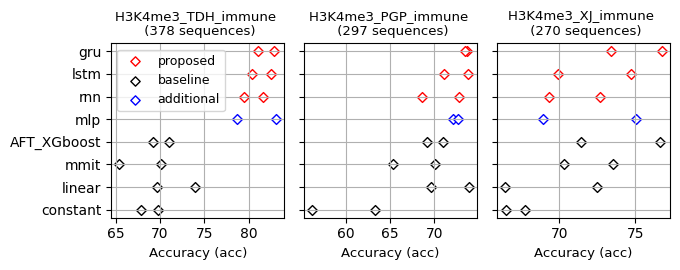

In [12]:
datasets_list = ['H3K4me3_TDH_immune', 'H3K4me3_PGP_immune', 'H3K4me3_XJ_immune']
plot_multiple_datasets(datasets_list)

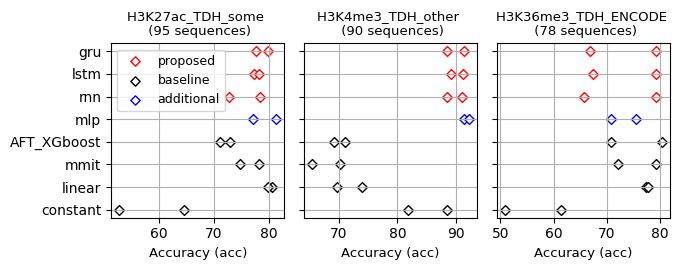

In [15]:
datasets_list = ['H3K27ac_TDH_some', 'H3K4me3_TDH_other', 'H3K36me3_TDH_ENCODE']
plot_multiple_datasets(datasets_list)

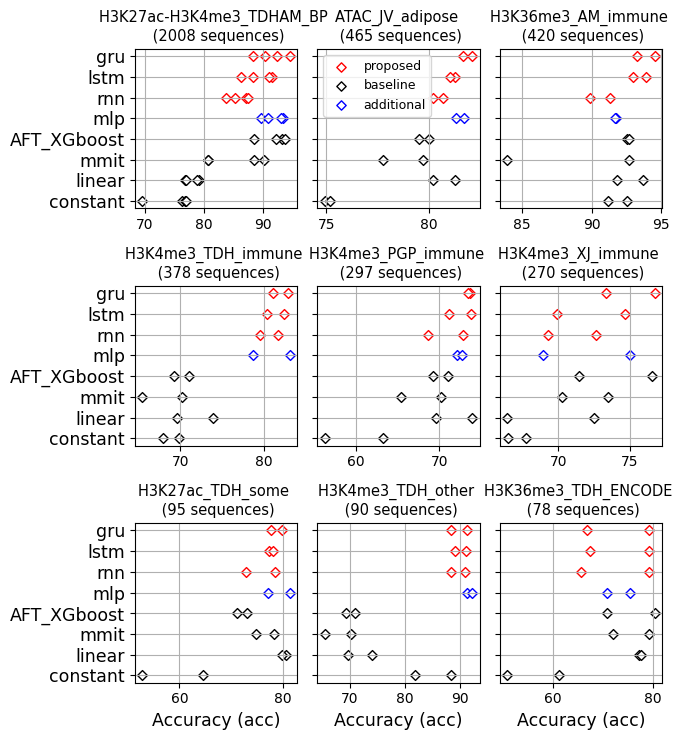

In [29]:
def plot_multiple_datasets(datasets):
    # Number of datasets and determine the number of rows and columns
    num_datasets = len(datasets)
    num_columns = 3  # Fixed number of columns (3 per row)
    num_rows = (num_datasets + num_columns - 1) // num_columns  # Compute the number of rows needed

    # Create a figure with subplots in a grid layout
    fig, axes = plt.subplots(num_rows, num_columns, figsize=(2.3 * num_columns, 2.5 * num_rows), sharey=True)

    # Flatten axes array for easier indexing, in case of multiple rows and columns
    axes = axes.flatten()

    # Loop through each dataset and subplot
    for i, dataset in enumerate(datasets):
        # Load dataset
        acc_df = pd.read_csv(f"../acc_rate_csvs/{dataset}.csv")
        acc_df['method'] = acc_df['method'].str.replace('-square', '', regex=False).str.replace('_L1reg', '', regex=False)
        dataset_size = pd.read_csv(f"../training_data/{dataset}/folds.csv").shape[0]

        # Define a fixed order for the methods
        fixed_method_order = ['constant', 'linear', 'mmit', 'AFT_XGboost', 'mlp', 'rnn', 'lstm', 'gru']

        # Create a subplot for each dataset
        ax = axes[i]

        # Add labels for the first plot
        if (i > num_rows*2-1):
            ax.set_xlabel('Accuracy (acc)', fontsize=12.5)
        ax.set_title(f'{dataset} \n ({dataset_size} sequences)', fontsize=10.5)  # Adjust fontsize as needed

        # Plot accuracy per fold
        for method in fixed_method_order:
            if method in acc_df['method'].unique():
                method_data = acc_df[acc_df['method'] == method]
                
                # Set color to red if method contains 'gru' or 'lstm', otherwise black
                color = 'red' if "gru" in method or "lstm" in method or "rnn" in method else 'blue' if "mlp" in method else 'black'
                
                # Scatter plot (all methods treated the same)
                ax.scatter(method_data['acc'], [method]*len(method_data), s=25, marker='D', color='white', edgecolor=color, linewidth=1)

        # Show y-axis ticks and labels only for the left-most subplot
        ax.set_yticks(fixed_method_order)  # Set y-ticks to fixed method order
        ax.tick_params(axis='y', labelsize=12.5)
        ax.grid(True)

        # Create legend for the first subplot
        if i == 1:
            ax.scatter([], [], edgecolor='red', color='white', marker='D', s=10, label='proposed')  # Red diamond for proposed
            ax.scatter([], [], edgecolor='black', color='white', marker='D', s=10, label='baseline')  # Black diamond for previous work
            ax.scatter([], [], edgecolor='blue', color='white', marker='D', s=10, label='additional')  # Blue diamond for additional
            ax.legend(loc='upper left', fontsize=9, markerscale=1.5)  # Add legend with font size and markerscale

    # Hide any empty subplots if there are fewer datasets than the total number of subplots
    for j in range(num_datasets, len(axes)):
        axes[j].axis('off')

    # Adjust layout to ensure everything fits in the grid
    plt.tight_layout(rect=[0, 0, 1, 1])
    plt.savefig('pdfs/acc.pdf')

# Example usage
datasets = ['H3K27ac-H3K4me3_TDHAM_BP', 'ATAC_JV_adipose', 'H3K36me3_AM_immune', 'H3K4me3_TDH_immune', 'H3K4me3_PGP_immune', 'H3K4me3_XJ_immune', 'H3K27ac_TDH_some', 'H3K4me3_TDH_other', 'H3K36me3_TDH_ENCODE']
plot_multiple_datasets(datasets)